<a href="https://colab.research.google.com/github/firarru/Sistem-Operasi-/blob/main/4_Studi%20Kasus%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("psparks/instacart-market-basket-analysis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/psparks/instacart-market-basket-analysis/versions/1


# Data Orders

In [3]:
import pandas as pd
import os

# Cek file yang tersedia dalam dataset
files = os.listdir(path)
print("Files in dataset:", files)

# Baca salah satu file (misal: orders.csv)
dataset_path = os.path.join(path, "departments.csv")  # Sesuaikan dengan file yang ada
df = pd.read_csv(dataset_path)

# Tampilkan 5 baris pertama
df.head(10)

Files in dataset: ['aisles.csv', 'orders.csv', 'departments.csv', 'order_products__train.csv', 'order_products__prior.csv', 'products.csv']


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [4]:
# Baca salah satu file (misal: orders.csv)
dataset_path = os.path.join(path, "orders.csv")  # Sesuaikan dengan file yang ada
df1 = pd.read_csv(dataset_path)

# Tampilkan 5 baris pertama
df1.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [5]:
df1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [7]:
df1.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [8]:
# Mengecek jumlah duplikat dalam dataset ratings
jumlah_duplikat = df1.duplicated().sum()

# Menampilkan hasil pengecekan
print(f"Jumlah Duplikat data: {jumlah_duplikat}")

if jumlah_duplikat == 0:
    print("Tidak ada duplikat yang ditemukan.")
else:
    print(f"Ada {jumlah_duplikat} duplikat yang ditemukan.")

Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.


In [9]:
missing_values = df1.isnull().sum()
missing_percentage = (missing_values / len(df1)) * 100
# Membuat tabel hasil dalam DataFrame
missing_table = pd.DataFrame({
    'Kolom': df1.columns,
    'Jumlah Missing': missing_values,
    'Persentase Missing (%)': missing_percentage
}).reset_index(drop=True)

missing_table

,Kolom,Jumlah Missing,Persentase Missing (%)
0,order_id,0,0.000000
1,user_id,0,0.000000
2,eval_set,0,0.000000
3,order_number,0,0.000000
4,order_dow,0,0.000000
5,order_hour_of_day,0,0.000000
6,days_since_prior_order,206209,6.027594


In [10]:
df1['days_since_prior_order'].fillna(0, inplace=True)

# Verify the changes
print(df1.isnull().sum())


<ipython-input-10-6ae3d2e8245e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['days_since_prior_order'].fillna(0, inplace=True)


order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


#Data Aisles

In [11]:
# Baca salah satu file (misal: orders.csv)
dataset_path = os.path.join(path, "aisles.csv")  # Sesuaikan dengan file yang ada
df2 = pd.read_csv(dataset_path)

# Tampilkan 5 baris pertama
df2.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [13]:
df2.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [14]:
# Mengecek jumlah duplikat dalam dataset ratings
jumlah_duplikat = df2.duplicated().sum()

# Menampilkan hasil pengecekan
print(f"Jumlah Duplikat data: {jumlah_duplikat}")

if jumlah_duplikat == 0:
    print("Tidak ada duplikat yang ditemukan.")
else:
    print(f"Ada {jumlah_duplikat} duplikat yang ditemukan.")

Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.


In [15]:
missing_values = df2.isnull().sum()
missing_percentage = (missing_values / len(df2)) * 100
# Membuat tabel hasil dalam DataFrame
missing_table = pd.DataFrame({
    'Kolom': df2.columns,
    'Jumlah Missing': missing_values,
    'Persentase Missing (%)': missing_percentage
}).reset_index(drop=True)

missing_table

,Kolom,Jumlah Missing,Persentase Missing (%)
0,aisle_id,0,0.0
1,aisle,0,0.0


# Data departments

In [16]:
# Baca salah satu file (misal: orders.csv)
dataset_path = os.path.join(path, "departments.csv")  # Sesuaikan dengan file yang ada
df3 = pd.read_csv(dataset_path)

# Tampilkan 5 baris pertama
df3.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [18]:
df3.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [19]:
# Mengecek jumlah duplikat dalam dataset ratings
jumlah_duplikat = df3.duplicated().sum()

# Menampilkan hasil pengecekan
print(f"Jumlah Duplikat data: {jumlah_duplikat}")

if jumlah_duplikat == 0:
    print("Tidak ada duplikat yang ditemukan.")
else:
    print(f"Ada {jumlah_duplikat} duplikat yang ditemukan.")

Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.


In [20]:
missing_values = df3.isnull().sum()
missing_percentage = (missing_values / len(df3)) * 100
# Membuat tabel hasil dalam DataFrame
missing_table = pd.DataFrame({
    'Kolom': df3.columns,
    'Jumlah Missing': missing_values,
    'Persentase Missing (%)': missing_percentage
}).reset_index(drop=True)

missing_table

,Kolom,Jumlah Missing,Persentase Missing (%)
0,department_id,0,0.0
1,department,0,0.0


#  Data order_products__train

In [21]:
# Baca salah satu file (misal: orders.csv)
dataset_path = os.path.join(path, "order_products__train.csv")  # Sesuaikan dengan file yang ada
df4 = pd.read_csv(dataset_path)

# Tampilkan 5 baris pertama
df4.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [23]:
df4.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


In [24]:
# Mengecek jumlah duplikat dalam dataset ratings
jumlah_duplikat = df4.duplicated().sum()

# Menampilkan hasil pengecekan
print(f"Jumlah Duplikat data: {jumlah_duplikat}")

if jumlah_duplikat == 0:
    print("Tidak ada duplikat yang ditemukan.")
else:
    print(f"Ada {jumlah_duplikat} duplikat yang ditemukan.")

Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.


In [25]:
missing_values = df4.isnull().sum()
missing_percentage = (missing_values / len(df4)) * 100
# Membuat tabel hasil dalam DataFrame
missing_table = pd.DataFrame({
    'Kolom': df4.columns,
    'Jumlah Missing': missing_values,
    'Persentase Missing (%)': missing_percentage
}).reset_index(drop=True)

missing_table

,Kolom,Jumlah Missing,Persentase Missing (%)
0,order_id,0,0.0
1,product_id,0,0.0
2,add_to_cart_order,0,0.0
3,reordered,0,0.0


# Data order_products__prior

In [26]:
dataset_path = os.path.join(path, "order_products__prior.csv")  # Sesuaikan dengan file yang ada
df5 = pd.read_csv(dataset_path)

# Tampilkan 5 baris pertama
df5.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [27]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [28]:
df5.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [29]:
# Mengecek jumlah duplikat dalam dataset ratings
jumlah_duplikat = df5.duplicated().sum()

# Menampilkan hasil pengecekan
print(f"Jumlah Duplikat data: {jumlah_duplikat}")

if jumlah_duplikat == 0:
    print("Tidak ada duplikat yang ditemukan.")
else:
    print(f"Ada {jumlah_duplikat} duplikat yang ditemukan.")

Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.


In [30]:
missing_values = df5.isnull().sum()
missing_percentage = (missing_values / len(df4)) * 100
# Membuat tabel hasil dalam DataFrame
missing_table = pd.DataFrame({
    'Kolom': df4.columns,
    'Jumlah Missing': missing_values,
    'Persentase Missing (%)': missing_percentage
}).reset_index(drop=True)

missing_table

,Kolom,Jumlah Missing,Persentase Missing (%)
0,order_id,0,0.0
1,product_id,0,0.0
2,add_to_cart_order,0,0.0
3,reordered,0,0.0


# Data products

In [31]:
dataset_path = os.path.join(path, "products.csv")  # Sesuaikan dengan file yang ada
df6 = pd.read_csv(dataset_path)

# Tampilkan 5 baris pertama
df6.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [32]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [33]:
df6.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [34]:
# Mengecek jumlah duplikat dalam dataset ratings
jumlah_duplikat = df6.duplicated().sum()

# Menampilkan hasil pengecekan
print(f"Jumlah Duplikat data: {jumlah_duplikat}")

if jumlah_duplikat == 0:
    print("Tidak ada duplikat yang ditemukan.")
else:
    print(f"Ada {jumlah_duplikat} duplikat yang ditemukan.")

Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.


In [35]:
missing_values = df6.isnull().sum()
missing_percentage = (missing_values / len(df6)) * 100
# Membuat tabel hasil dalam DataFrame
missing_table = pd.DataFrame({
    'Kolom': df6.columns,
    'Jumlah Missing': missing_values,
    'Persentase Missing (%)': missing_percentage
}).reset_index(drop=True)

missing_table

,Kolom,Jumlah Missing,Persentase Missing (%)
0,product_id,0,0.0
1,product_name,0,0.0
2,aisle_id,0,0.0
3,department_id,0,0.0


# Jumlah Baris dan Kolom

In [36]:

shape_data = pd.DataFrame({
    "Dataset": [
        "Orders Data",
        "Aisles Data",
        "Departments Data",
        "Order_Products_Train",
        "Order_Products_Prior",
        "Products Data"
    ],
    "Shape": [
        df1.shape,
        df2.shape,
        df3.shape,
        df4.shape,
        df5.shape,
        df6.shape
    ]
})

shape_data



,Dataset,Shape
0,Orders Data,"(3421083, 7)"
1,Aisles Data,"(134, 2)"
2,Departments Data,"(21, 2)"
3,Order_Products_Train,"(1384617, 4)"
4,Order_Products_Prior,"(32434489, 4)"
5,Products Data,"(49688, 4)"


# EDA (Exploratory Data Analysis)

## Distibusi Pesanan Perhari

<ipython-input-37-ef66f3d004b7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['order_dow_label'], palette='Blues', order=day_labels.values())


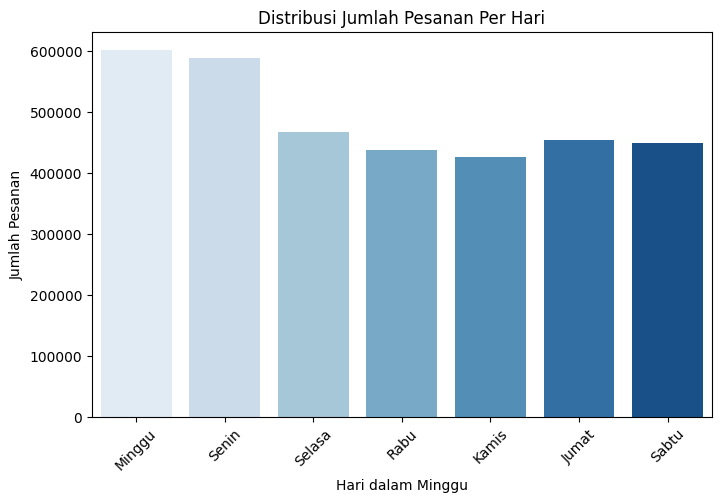

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping order_dow ke nama hari
day_labels = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}

# Ubah angka menjadi label hari
df1['order_dow_label'] = df1['order_dow'].map(day_labels)

# Plot dengan label hari yang lebih jelas
plt.figure(figsize=(8,5))
sns.countplot(x=df1['order_dow_label'], palette='Blues', order=day_labels.values())
plt.xlabel("Hari dalam Minggu")
plt.ylabel("Jumlah Pesanan")
plt.title("Distribusi Jumlah Pesanan Per Hari")
plt.xticks(rotation=45)  # Rotasi agar lebih mudah dibaca
plt.show()


## Produk Terlaris

<ipython-input-38-c2738edc23f2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products['product_name'], x=top_products['total_orders'], palette="Greens")


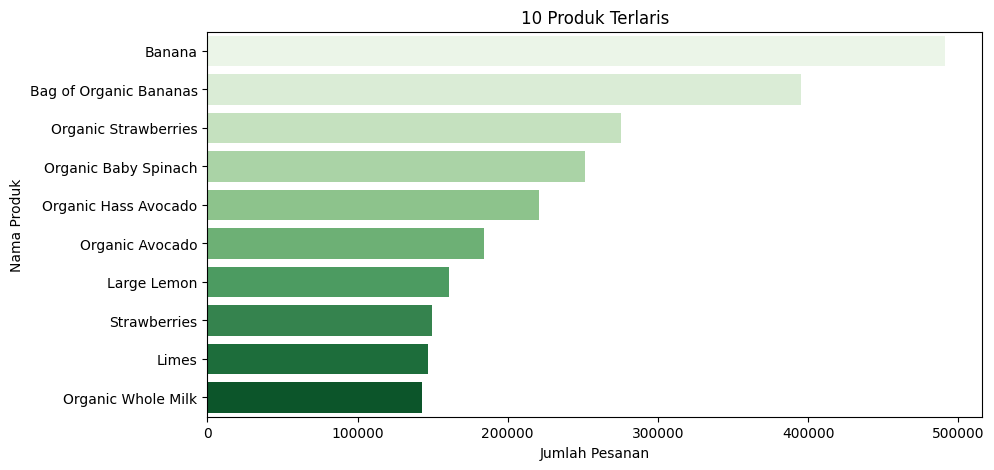

In [38]:
# Gabungkan df4 dan df5 untuk mendapatkan semua transaksi
order_products = pd.concat([df4, df5])

# Hitung jumlah pemesanan per produk
top_products = order_products['product_id'].value_counts().head(10).reset_index()
top_products.columns = ['product_id', 'total_orders']

# Gabungkan dengan df6 untuk mendapatkan nama produk
top_products = top_products.merge(df6[['product_id', 'product_name']], on='product_id', how='left')

# Visualisasi
plt.figure(figsize=(10,5))
sns.barplot(y=top_products['product_name'], x=top_products['total_orders'], palette="Greens")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Nama Produk")
plt.title("10 Produk Terlaris")
plt.show()


## Departemen dengan Penjualan Tertinggi

<ipython-input-39-6ecea8722506>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_departments['department'], x=top_departments['total_orders'], palette="Oranges")


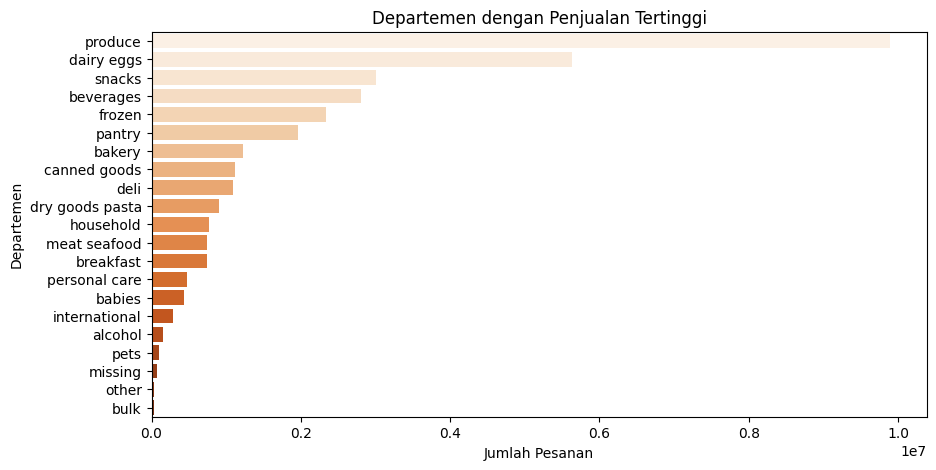

In [39]:
# Gabungkan data produk dengan transaksi
order_products = order_products.merge(df6[['product_id', 'department_id']], on='product_id', how='left')

# Hitung jumlah pesanan per department
top_departments = order_products['department_id'].value_counts().reset_index()
top_departments.columns = ['department_id', 'total_orders']

# Gabungkan dengan df3 (departments) untuk mendapatkan nama department
top_departments = top_departments.merge(df3, on='department_id', how='left')

# Visualisasi
plt.figure(figsize=(10,5))
sns.barplot(y=top_departments['department'], x=top_departments['total_orders'], palette="Oranges")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Departemen")
plt.title("Departemen dengan Penjualan Tertinggi")
plt.show()


## Pola Pembelian Ulang (Reorder)

<ipython-input-40-75af75b9496d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reorder_counts.index, y=reorder_counts.values, palette="coolwarm")


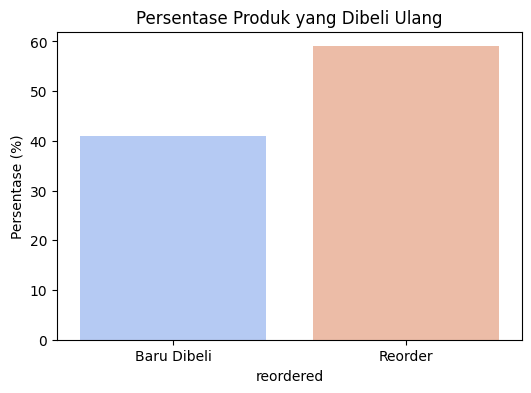

In [40]:
# Menghitung jumlah produk yang di-reorder vs tidak
reorder_counts = order_products['reordered'].value_counts(normalize=True) * 100

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=reorder_counts.index, y=reorder_counts.values, palette="coolwarm")
plt.xticks([0,1], ["Baru Dibeli", "Reorder"])
plt.ylabel("Persentase (%)")
plt.title("Persentase Produk yang Dibeli Ulang")
plt.show()


# Feature Engineering

In [41]:
# Menangani Missing Values
df1['days_since_prior_order'].fillna(0, inplace=True)


<ipython-input-41-2a3fed6ce759>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['days_since_prior_order'].fillna(0, inplace=True)


In [42]:

# Menggabungkan tabel transaksi
df_orders = pd.concat([df4, df5])

In [43]:
df_orders = df_orders.merge(df6[['product_id', 'product_name', 'aisle_id', 'department_id']], on='product_id', how='left')

In [44]:
df_orders = df_orders.merge(df1[['order_id', 'user_id', 'days_since_prior_order']], on='order_id', how='left')

In [45]:
# Frekuensi pembelian per pelanggan
user_order_counts = df_orders.groupby('user_id')['order_id'].nunique().reset_index()
user_order_counts.columns = ['user_id', 'total_orders']


In [46]:
# Waktu terakhir pembelian produk
last_purchase = df_orders.groupby('product_id')['days_since_prior_order'].max().reset_index()
last_purchase.columns = ['product_id', 'last_purchase_days']

In [47]:
# Rasio pembelian ulang
repeat_ratio = df_orders.groupby('product_id')['reordered'].mean().reset_index()
repeat_ratio.columns = ['product_id', 'reorder_ratio']

In [48]:
# Encoding data kategorikal
df_orders['aisle_id'] = df_orders['aisle_id'].astype('category').cat.codes
df_orders['department_id'] = df_orders['department_id'].astype('category').cat.codes

In [49]:
# Gabungkan semua hasil
feature_df = df_orders.merge(user_order_counts, on='user_id', how='left')

In [ ]:
feature_df = feature_df.merge(last_purchase, on='product_id', how='left')

In [ ]:
feature_df = feature_df.merge(repeat_ratio, on='product_id', how='left')

In [1]:
print(feature_df.head())

NameError: name 'feature_df' is not defined